In [3]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import json

from indralib.indra_event import IndraEvent
from indralib.indra_time import IndraTime
from indralib.indra_client import IndraClient

Matplotlib is building the font cache; this may take a moment.


In [4]:
with open('indra_creds.json', 'r') as f:
    creds = json.load(f)
    print(f"Using profile {creds['profile']} and user {creds['username']}")

Using profile Localhost and user stat


In [5]:
cl = IndraClient(profile_name='Nalanda') # creds['profile'])

In [6]:
ws = await cl.init_connection(verbose=True)

In [7]:
res = await cl.login_wait(creds['username'], creds['password'])

In [8]:
dom_list = await cl.get_wait_unique_domains(domain="$event/measurement%", data_type="number/float%") 

In [9]:
async def plot_measurements(domain, timedelta=datetime.timedelta(hours=1)):
    dt_start = datetime.datetime.now(datetime.timezone.utc) - timedelta
    data = await cl.get_wait_history(domain, start_time=IndraTime.datetime2julian(dt_start), sample_size=1000)
    dt, y = IndraClient.get_timeseries(data)
    plt.xticks(rotation=30, fontweight='light',  fontsize='x-small',)
    plt.title(domain)
    plt.plot(dt, y)    
    plt.show()

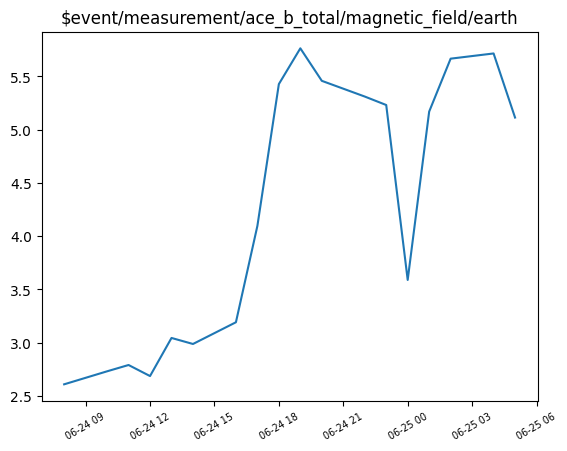

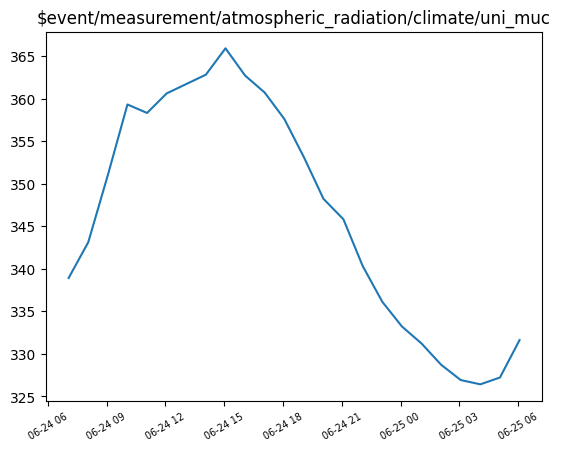

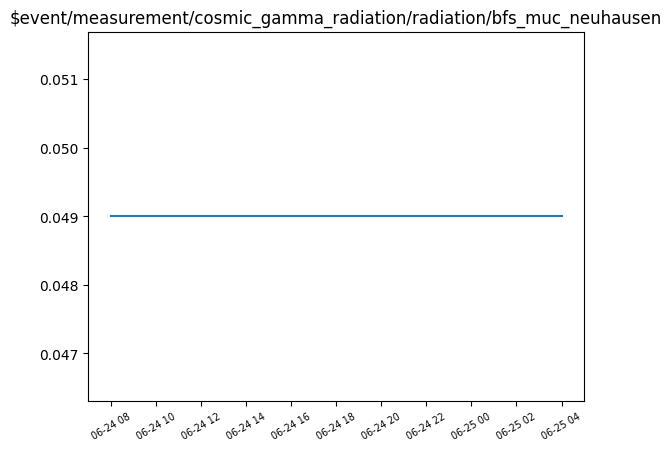

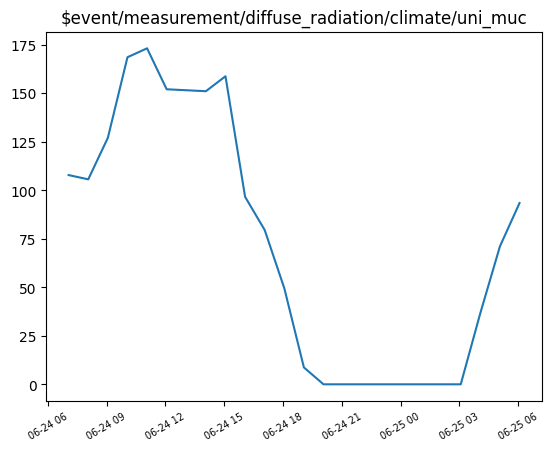

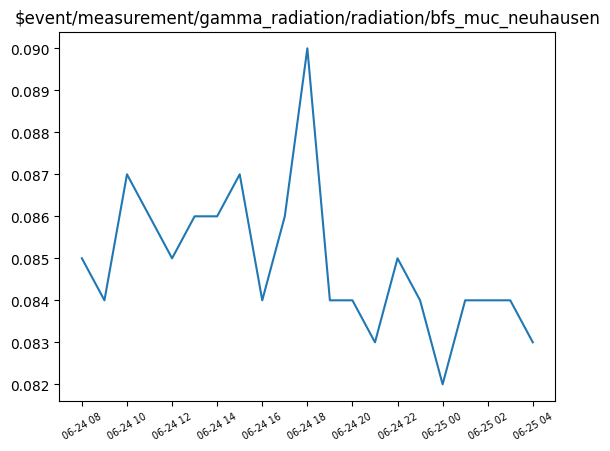

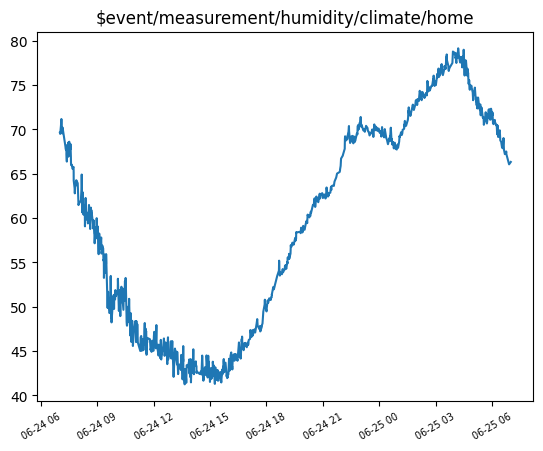

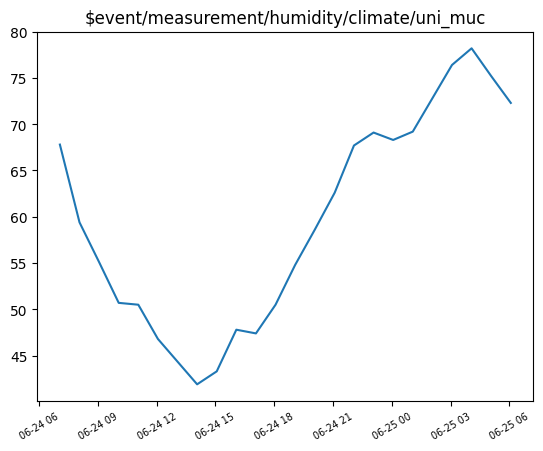

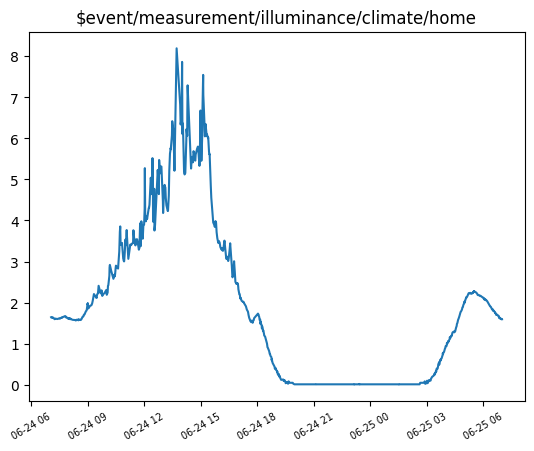

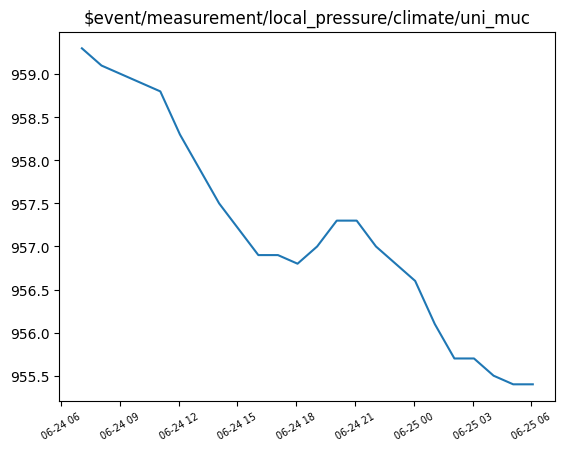

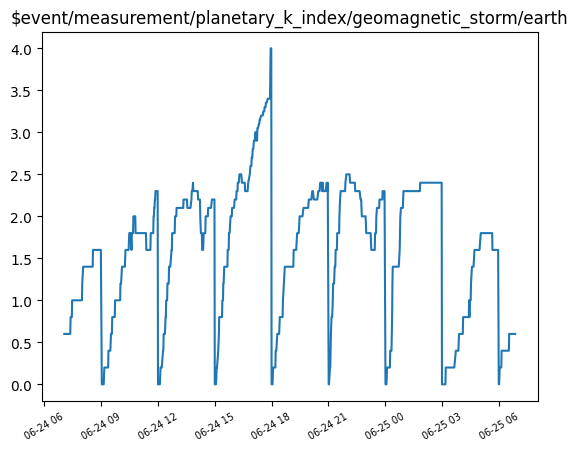

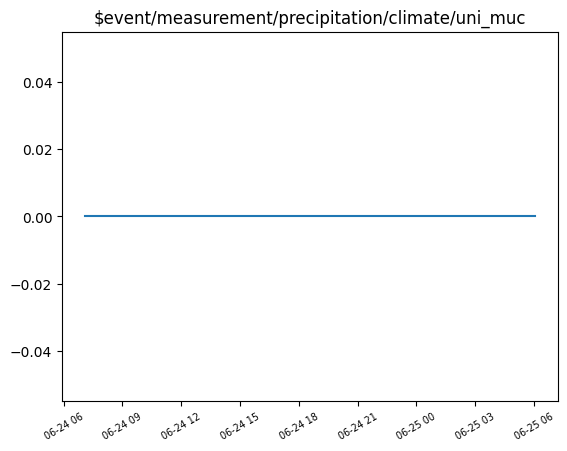

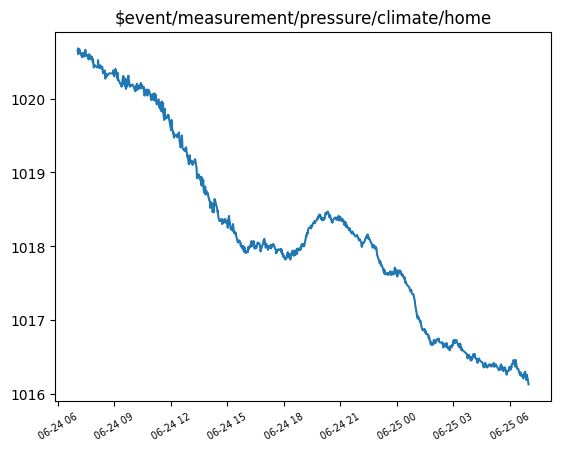

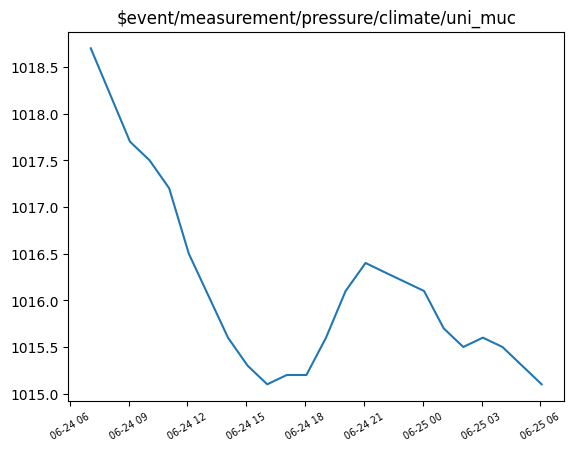

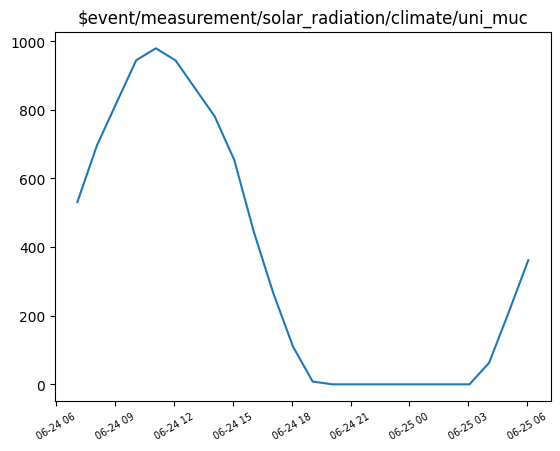

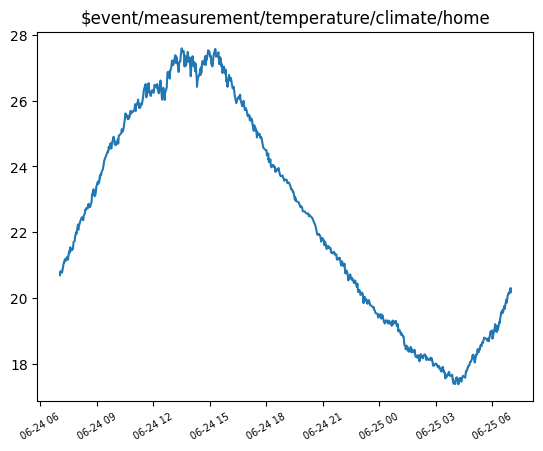

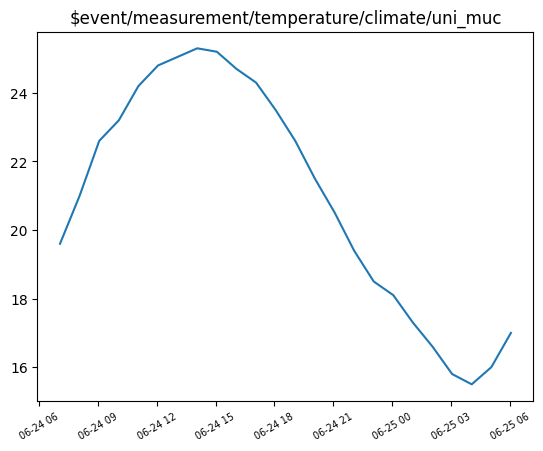

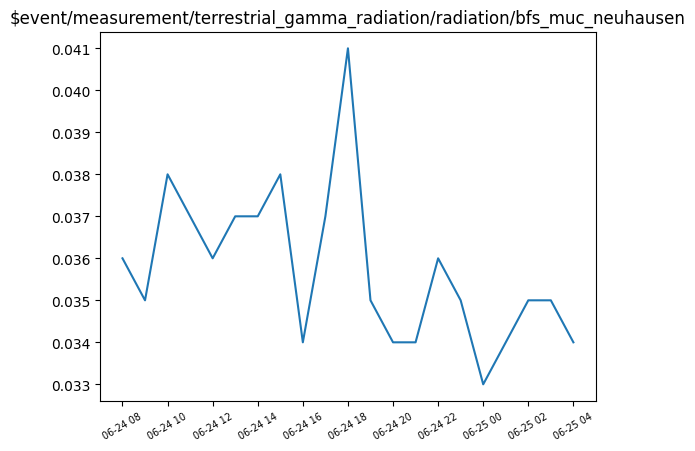

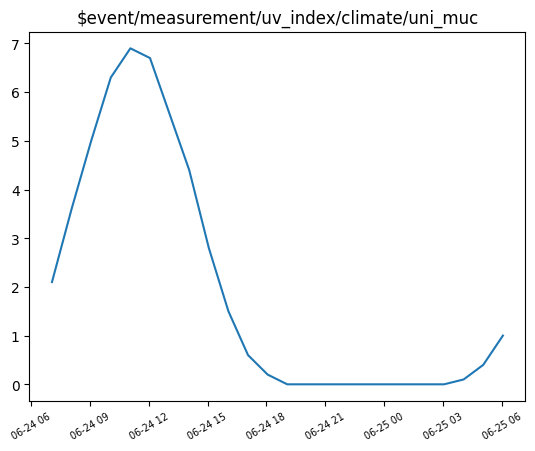

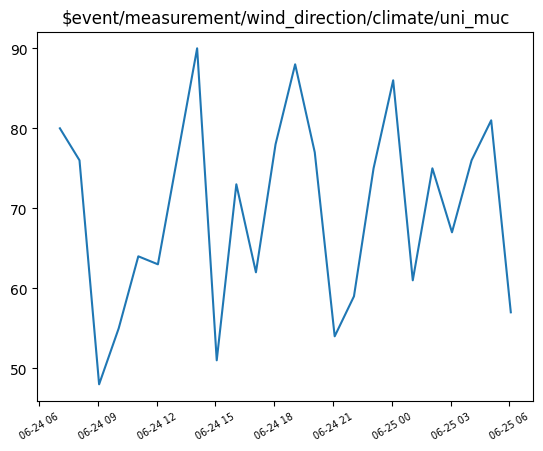

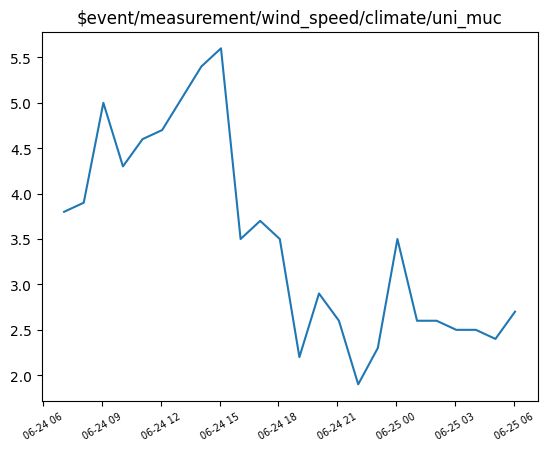

In [10]:
for dom in dom_list:
    await plot_measurements(dom, timedelta=datetime.timedelta(days=1))